In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_lc = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")


In [ ]:
data_lc.shape


(309, 16)

In [ ]:
data_lc["LUNG_CANCER"]=data_lc["LUNG_CANCER"].fillna(data_lc["LUNG_CANCER"].mode()[0])

In [ ]:
data_lc.isnull().any()

GENDER                   False
AGE                      False
SMOKING                  False
YELLOW_FINGERS           False
ANXIETY                  False
PEER_PRESSURE            False
CHRONIC DISEASE          False
FATIGUE                  False
ALLERGY                  False
WHEEZING                 False
ALCOHOL CONSUMING        False
COUGHING                 False
SHORTNESS OF BREATH      False
SWALLOWING DIFFICULTY    False
CHEST PAIN               False
LUNG_CANCER              False
dtype: bool

In [ ]:
data_lc.corr()

<ipython-input-14-43c7b45eaa15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_lc.corr()


AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
AGE                    1.000000 -0.084475        0.005205  0.053170   
SMOKING               -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS         0.005205 -0.014585        1.000000  0.565829   
ANXIETY                0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE          0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE                0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.169950 -0.129471       -0.012640 -0.225644   
SHORTNESS OF BREATH   -0.017513  0.061264       -0.105944 -0.144077   
SWALLOWING DIFFICULTY -0.001270  0.030718        0.345904  0.489403   
CHEST PAIN            -0.018104  0.120117       -0.104829 -0.113634   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
AGE                         0.018685        -0.012642  0.012614  0.027990   
SMOKING                    -0.042822        -0.141522 -0.029575  0.001913   
YELLOW_FINGERS              0.323083         0.041122 -0.118058 -0.144300   
ANXIETY                     0.216841        -0.009678 -0.188538 -0.165750   
PEER_PRESSURE               1.000000         0.048515  0.078148 -0.081800   
CHRONIC DISEASE             0.048515         1.000000 -0.110529  0.106386   
FATIGUE                     0.078148        -0.110529  1.000000  0.003056   
ALLERGY                    -0.081800         0.106386  0.003056  1.000000   
WHEEZING                   -0.068771        -0.049967  0.141937  0.173867   
ALCOHOL CONSUMING          -0.159973         0.002150 -0.191377  0.344339   
COUGHING                   -0.089019        -0.175287  0.146856  0.189524   
SHORTNESS OF BREATH        -0.220175        -0.026459  0.441745 -0.030056   
SWALLOWING DIFFICULTY       0.366590         0.075176 -0.132790 -0.061508   
CHEST PAIN                 -0.094828        -0.036938 -0.010832  0.239433   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
AGE                    0.055011           0.058985  0.169950   
SMOKING               -0.129426          -0.050623 -0.129471   
YELLOW_FINGERS        -0.078515          -0.289025 -0.012640   
ANXIETY               -0.191807          -0.165750 -0.225644   
PEER_PRESSURE         -0.068771          -0.159973 -0.089019   
CHRONIC DISEASE       -0.049967           0.002150 -0.175287   
FATIGUE                0.141937          -0.191377  0.146856   
ALLERGY                0.173867           0.344339  0.189524   
WHEEZING               1.000000           0.265659  0.374265   
ALCOHOL CONSUMING      0.265659           1.000000  0.202720   
COUGHING               0.374265           0.202720  1.000000   
SHORTNESS OF BREATH    0.037834          -0.179416  0.277385   
SWALLOWING DIFFICULTY  0.069027          -0.009294 -0.157586   
CHEST PAIN             0.147640           0.331226  0.083958   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
AGE                              -0.017513              -0.001270   -0.018104  
SMOKING                           0.061264               0.030718    0.120117  
YELLOW_FINGERS                   -0.105944               0.345904   -0.104829  
ANXIETY                          -0.144077               0.489403   -0.113634  
PEER_PRESSURE                    -0.220175               0.366590   -0.094828  
CHRONIC DISEASE                  -0.026459               0.075176   -0.036938  
FATIGUE                           0.441745              -0.132790   -0.010832  
ALLERGY                          -0.030056              -0.061508    0.239433  
WHEEZING                          0.037834               0.069027    0.147640  
ALCOHOL CONSUMING                -0.179416   

<ipython-input-15-253ddb14d59f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_lc.corr(),annot=True,fmt="0.1f")


<Axes: >

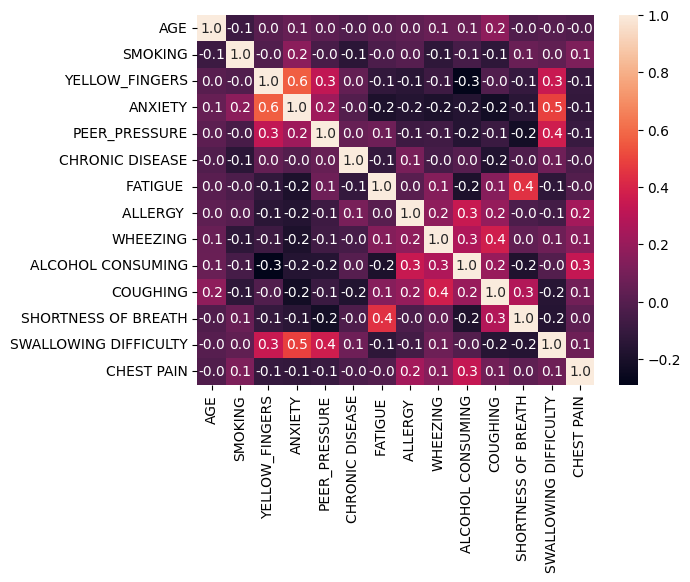

In [ ]:
sns.heatmap(data_lc.corr(),annot=True,fmt="0.1f")

In [ ]:
S_Dummy = pd.get_dummies(data_lc["LUNG_CANCER"],drop_first=True)

<ipython-input-17-7d534b282d6b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_lc["AGE"])


<Axes: xlabel='AGE', ylabel='Density'>

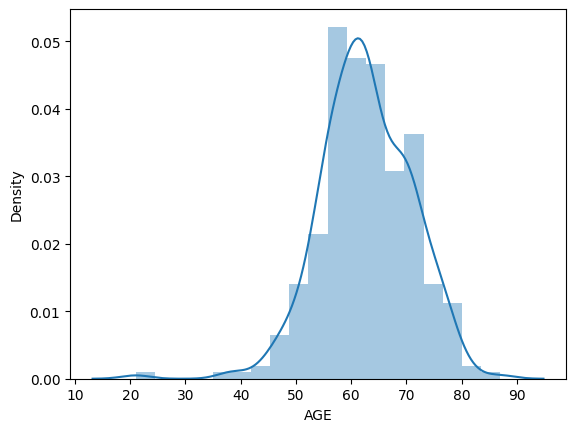

In [ ]:
sns.distplot(data_lc["AGE"])

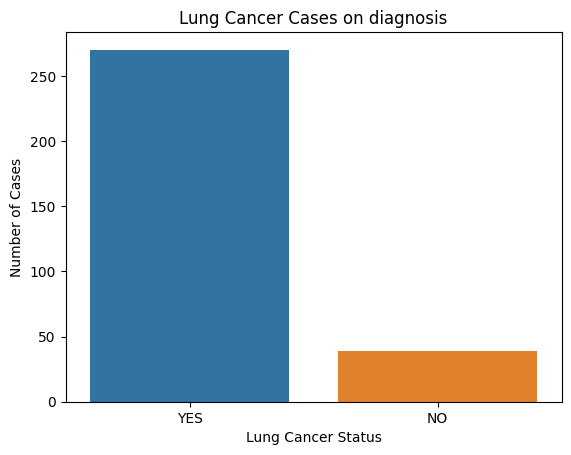

In [ ]:
sns.countplot(x='LUNG_CANCER', data=data_lc)
plt.xlabel('Lung Cancer Status')
plt.ylabel('Number of Cases')
plt.title('Lung Cancer Cases on diagnosis')
plt.show()

<Axes: xlabel='GENDER', ylabel='AGE'>

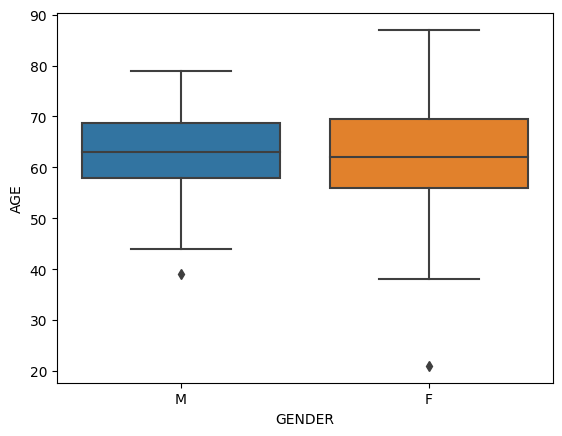

In [ ]:
sns.boxplot(data=data_lc,x="GENDER",y="AGE")

<Axes: xlabel='AGE', ylabel='count'>

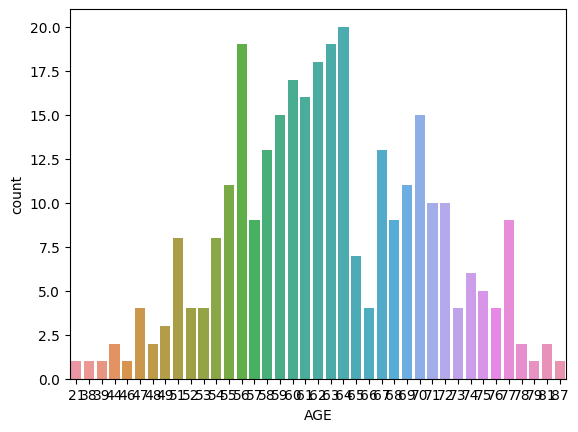

In [ ]:
sns.countplot(data=data_lc,x="AGE")

<Axes: xlabel='AGE', ylabel='LUNG_CANCER'>

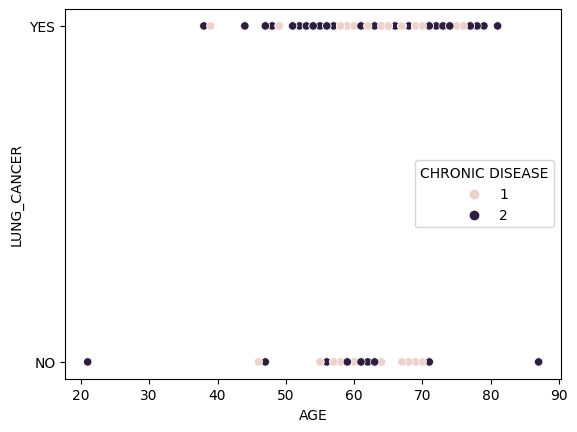

In [ ]:
sns.scatterplot(data=data_lc,x="AGE",y="LUNG_CANCER",hue='CHRONIC DISEASE')

In [ ]:

X = data_lc.drop('LUNG_CANCER', axis=1)
Y = data_lc['LUNG_CANCER']
print(X,Y)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [ ]:
X.head()
type(X)
pd.core.frame.DataFrame
Y.head()
type(Y)
pd.core.series.Series
print(data_lc["LUNG_CANCER"].value_counts())
print(data_lc["GENDER"].value_counts())
data_lc.info()


YES    270
NO      39
Name: LUNG_CANCER, dtype: int64
M    162
F    147
Name: GENDER, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309

In [ ]:
le= LabelEncoder()
data_lc["GENDER"]= le.fit_transform(data_lc["GENDER"])
data_lc["LUNG_CANCER"]= le.fit_transform(data_lc["LUNG_CANCER"])
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2,random_state=20)
print('Training set shape:', xtrain.shape, ytrain.shape)
print('Testing set shape:', xtest.shape, ytest.shape)


Training set shape: (247, 15) (247,)
Testing set shape: (62, 15) (62,)
